## **K-Nearest Neighbors Classifier - the Random Dataset**

### Importing the Necessary Libraries

In [92]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions
import time
import numpy as np

### Generating the Dataset

In [23]:
inputs , target = make_blobs(n_samples = 1000 , 
                             centers = [(-3,3) , (0,0) , (2,2)],
                             random_state = 365)

In [24]:
inputs.shape , target.shape

((1000, 2), (1000,))

In [25]:
data = pd.DataFrame(data = inputs , columns = ['Feature 1 ' , 'Feature 2'])
data ['Target'] = target                   
data

,Feature 1,Feature 2,Target
0,1.630460,2.094029,2
1,-2.811252,3.852241,0
2,0.501051,1.582531,2
3,-3.624112,3.325318,0
4,-3.278106,2.359416,0
...,...,...,...
995,-4.412271,2.420197,0
996,0.398022,-0.847863,1
997,-0.588974,0.317711,1
998,-2.328593,4.957489,0


In [26]:
data.columns = data.columns.str.strip()

### Plotting the Database

In [27]:
knn_palette = sns.color_palette(['#FF0000' , '#011f4b' , '#FFFF00'])
knn_palette

[(1.0, 0.0, 0.0),
 (0.00392156862745098, 0.12156862745098039, 0.29411764705882354),
 (1.0, 1.0, 0.0)]

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

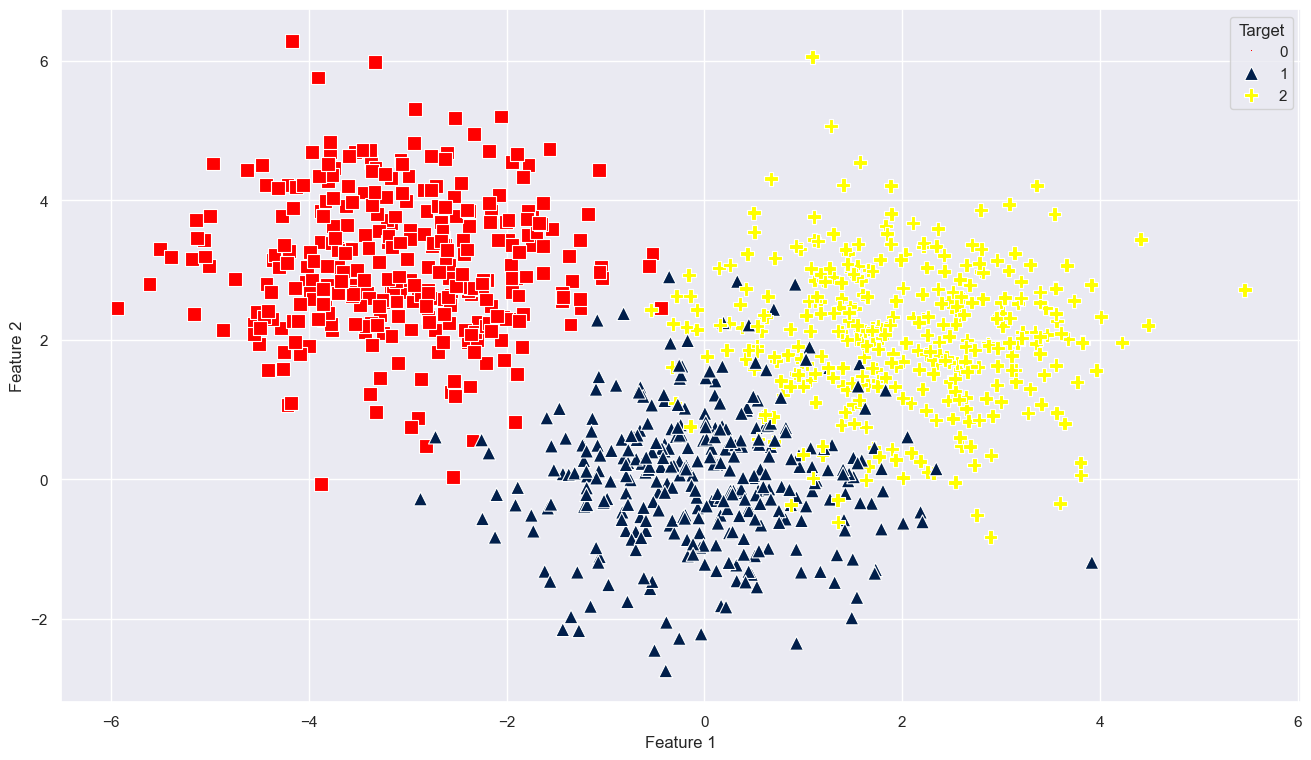

In [28]:
sns.set()
plt.figure(figsize = (16 , 9) )

sns.scatterplot(x = 'Feature 1' , y = 'Feature 2' , 
                data = data , 
                hue = 'Target' , palette = knn_palette , 
                markers = [',' , '^' , 'P'],
                style = 'Target',
                s = 100
                )

### Creating a train-test-split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, 
                                                    test_size=0.2, 
                                                    random_state=365, 
                                                    stratify=target)

### Creating the Model

In [64]:
clf = KNeighborsClassifier(n_neighbors = 30 , weights = 'uniform')
clf.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=30)

### Predecting a Sample

In [65]:
feature_1 = -0.18
feature_2 = 3.2

In [66]:
clf.predict([[feature_1 , feature_2]])

array([2])

In [67]:
neighbors = clf.kneighbors ([[feature_1 , feature_2]])
neighbors

(array([[0.27086818, 0.34749744, 0.40387913, 0.45668128, 0.57370524,
         0.58002987, 0.6147827 , 0.62680551, 0.76674656, 0.77233172,
         0.78175021, 0.84541382, 0.8741025 , 0.8769993 , 0.89014688,
         0.91521046, 0.92223527, 0.99986243, 1.01649367, 1.0231371 ,
         1.03996308, 1.04075309, 1.05202214, 1.05586882, 1.10512231,
         1.14601178, 1.15303035, 1.16564948, 1.16938942, 1.16964811]]),
 array([[336, 215, 679, 221, 690, 688, 269, 309, 543, 100,  79, 161, 708,
         613, 216, 291, 561, 748, 516, 140, 514, 399,  25, 255, 431,   0,
         386, 458,   3, 304]], dtype=int64))

### Visualizing the Neighbors

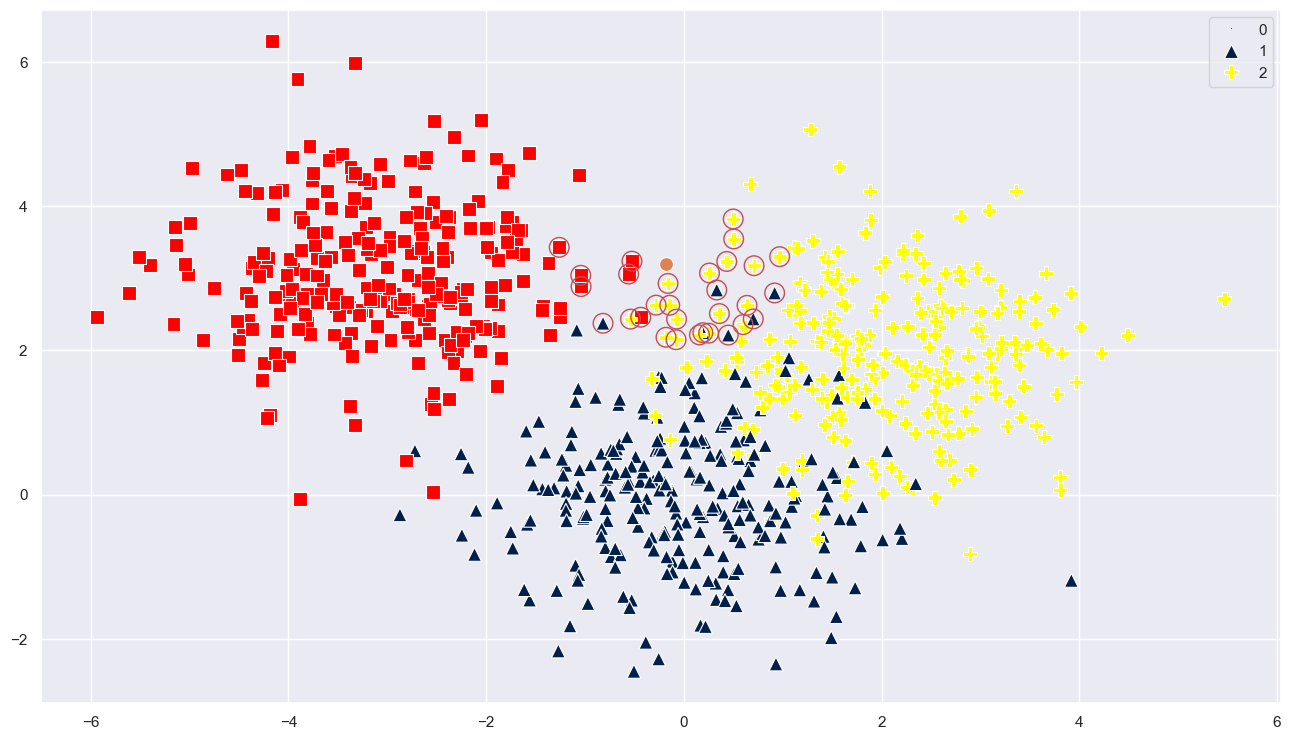

In [68]:
sns.set()

plt.figure(figsize = (16, 9))

sns.scatterplot(x = x_train[:, 0], y = x_train[:, 1],
                hue = y_train, 
                palette = knn_palette,
                markers = [',', '^', 'P'],
                style = y_train, 
                s = 100, 
                legend = True);

sns.scatterplot(x = [feature_1], y = [feature_2], 
                style = [feature_2],
                markers = ['o'],
                s = 100,
                legend = False);

plot_x_train = []
plot_y_train = []

for i in neighbors[1]:
    plot_x_train.append(x_train[i, 0])
    plot_y_train.append(x_train[i, 1])

plt.scatter(plot_x_train, 
            plot_y_train, 
            s=200, facecolors='none', edgecolors='r');

### Getting the paramenters of the model

In [69]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 30,
 'p': 2,
 'weights': 'uniform'}

### Drawing the decision region

In [71]:
x_train.shape

(800, 2)

Time elapsed: 136.5 seconds


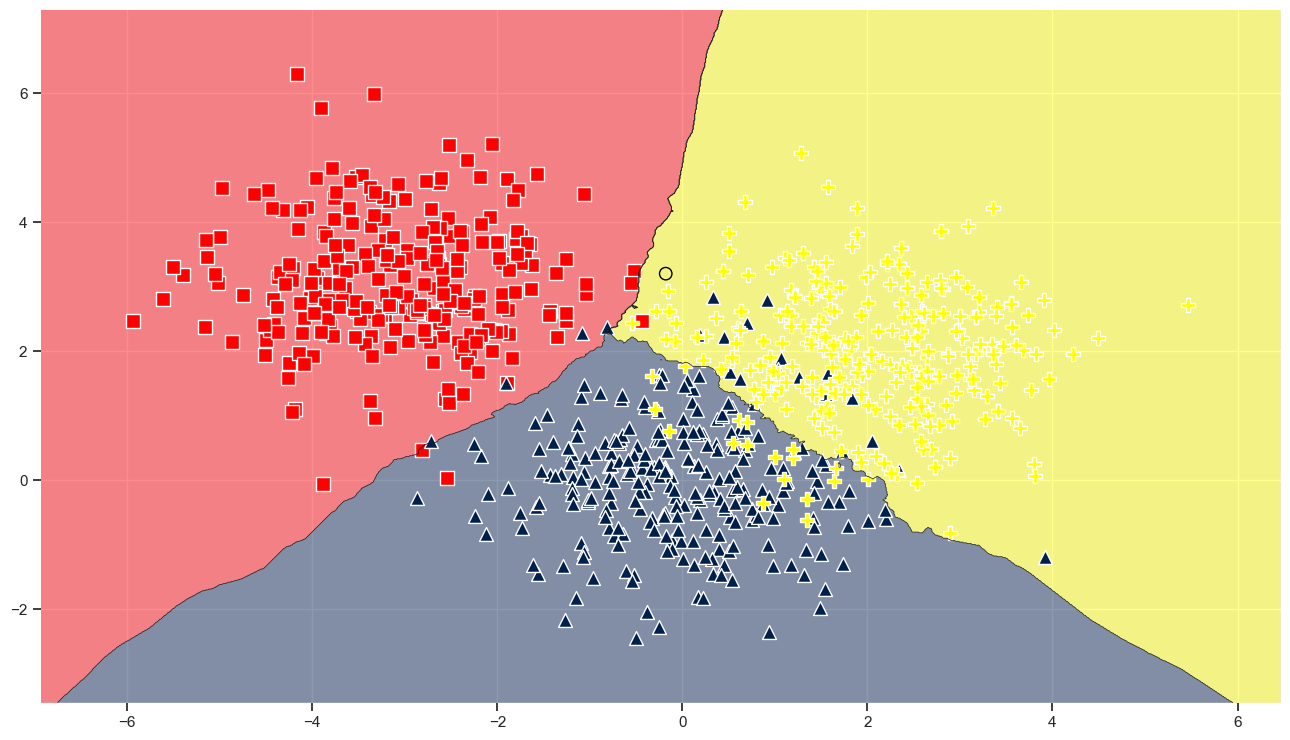

In [72]:
start = time.time()

plt.figure(figsize = (16, 9))

plot_decision_regions(X = x_train, y = y_train,
                      X_highlight = np.array([[feature_1, feature_2]]),
                      clf = clf,
                      markers = [',', '^', 'P'],
                      colors = '#FF0000,#011f4b,#FFFF00',
                      scatter_kwargs = {'s':100, 'edgecolor':'white', 'alpha':1},
                      legend = 0)

end = time.time()

print(f'Time elapsed: {round(end - start, 1)} seconds')

### Getting the error rates of a set of models

In [75]:
error_uniform = []
error_distance = []

k_range = range(1, 51)

for k in k_range:
    
    clf = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    error_uniform.append(1 - accuracy_score(y_test, predictions))
    
    clf = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    error_distance.append(1 - accuracy_score(y_test, predictions))

### Plotting the error rates as a function of the number of neighbors

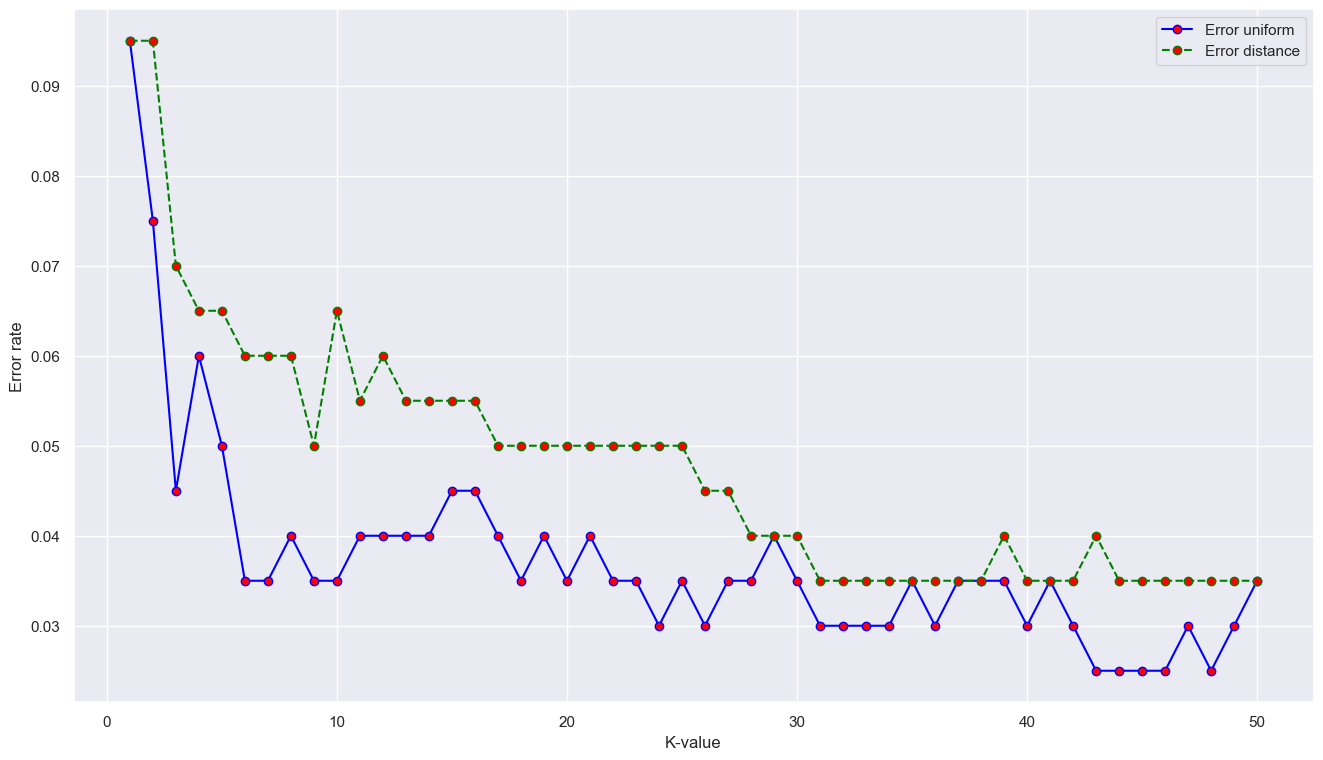

In [76]:
plt.figure(figsize = (16, 9))

plt.plot(k_range, error_uniform, c = 'blue', linestyle = 'solid', 
         marker = 'o', markerfacecolor = 'red',  label = 'Error uniform');
plt.plot(k_range, error_distance, c = 'green', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'red', label = 'Error distance');

plt.legend()

plt.xlabel('K-value')
plt.ylabel('Error rate');

### Choosing a Set of Parameters to Test

In [94]:
parameters = {'n_neighbors':range(1, 51), 
              'weights':['uniform', 'distance']}

### Create an instance of the GridSearchCV class

In [95]:
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), 
                           param_grid = parameters, 
                           scoring = 'accuracy')

In [96]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [97]:
grid_search.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [98]:
clf = grid_search.best_estimator_

In [99]:
clf

KNeighborsClassifier(n_neighbors=10)

In [86]:
grid_search.best_score_

0.9512499999999999

### Make predictions on the test dataset

In [87]:
y_test_pred = clf.predict(x_test)
y_test_pred.shape

(200,)

### Construct the confusion matrix

In [100]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

### Print out the classification report

In [93]:
print(classification_report(y_test, y_test_pred, target_names = ['0', '1', '2']))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.97      0.93      0.95        67
           2       0.93      0.98      0.96        66

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200

